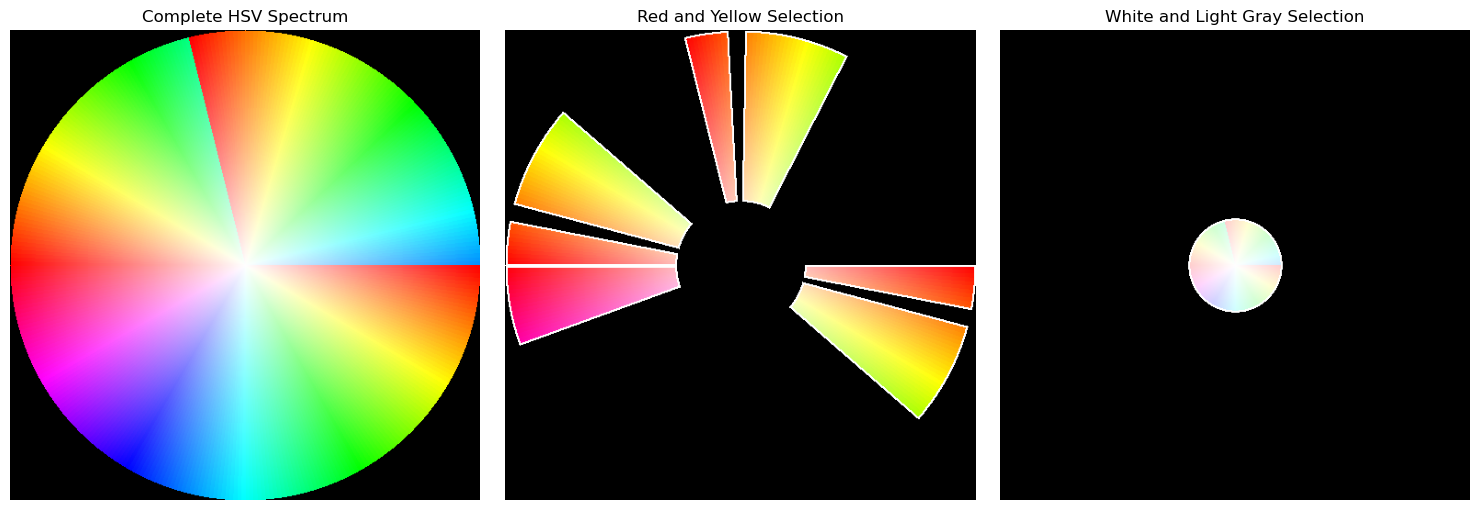

In [13]:
# A_Aug_HSV_Colour_wheel_visualisations_red_yellow_white_light_grey.jpynb
# Include in dissertation - image generated used 
# HSV Colour wheel visualisations - Highlight red and yellow on the colour wheel 
import numpy as np
import cv2
import matplotlib.pyplot as plt

def create_hsv_color_wheel():
    """
    Create an HSV color wheel for visualization.
    Returns:
        hsv_wheel (numpy array): HSV color wheel image.
    """
    radius = 256
    wheel = np.zeros((2 * radius, 2 * radius, 3), dtype=np.uint8)

    for y in range(-radius, radius):
        for x in range(-radius, radius):
            distance = np.sqrt(x ** 2 + y ** 2)
            if distance <= radius:
                angle = (np.arctan2(y, x) * 180 / np.pi + 360) % 360
                wheel[y + radius, x + radius] = (angle, int(255 * distance / radius), 255)

    hsv_wheel = cv2.cvtColor(wheel, cv2.COLOR_HSV2BGR)
    return hsv_wheel

def apply_mask_with_border(hsv_wheel, lower, upper):
    """
    Apply an HSV mask and add a border to the selected regions.
    Args:
        hsv_wheel (numpy array): HSV color wheel.
        lower (numpy array): Lower HSV bound.
        upper (numpy array): Upper HSV bound.
    Returns:
        masked_wheel (numpy array): Image with masked areas highlighted.
    """
    hsv_image = cv2.cvtColor(hsv_wheel, cv2.COLOR_BGR2HSV)
    mask = cv2.inRange(hsv_image, lower, upper)

    # Apply mask
    masked_wheel = cv2.bitwise_and(hsv_wheel, hsv_wheel, mask=mask)

    # Find contours for the mask
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw borders around selected regions
    bordered_wheel = hsv_wheel.copy()
    cv2.drawContours(bordered_wheel, contours, -1, (255, 255, 255), 2)

    return cv2.bitwise_and(bordered_wheel, bordered_wheel, mask=mask)

def visualize_hsv_selections():
    """
    Visualize the HSV selections in a 1x3 grid.
    """
    hsv_wheel = create_hsv_color_wheel()

    # Define HSV ranges
    lower_red1, upper_red1 = np.array([0, 70, 50]), np.array([10, 255, 255])
    lower_red2, upper_red2 = np.array([160, 70, 50]), np.array([180, 255, 255])
    lower_yellow, upper_yellow = np.array([15, 70, 70]), np.array([40, 255, 255])
    lower_white_grey, upper_white_grey = np.array([0, 0, 200]), np.array([180, 50, 255])

    # Combine red and yellow masks
    red_masked = apply_mask_with_border(hsv_wheel, lower_red1, upper_red1)
    red_masked += apply_mask_with_border(hsv_wheel, lower_red2, upper_red2)
    yellow_masked = apply_mask_with_border(hsv_wheel, lower_yellow, upper_yellow)
    red_yellow_masked = cv2.add(red_masked, yellow_masked)

    # White and light gray mask
    white_grey_masked = apply_mask_with_border(hsv_wheel, lower_white_grey, upper_white_grey)

    # Plot the images
    plt.figure(figsize=(15, 5))

    # Original color wheel
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(hsv_wheel, cv2.COLOR_BGR2RGB))
    plt.title("Complete HSV Spectrum")
    plt.axis("off")

    # Red and Yellow selections
    plt.subplot(1, 3, 2)
    plt.imshow(cv2.cvtColor(red_yellow_masked, cv2.COLOR_BGR2RGB))
    plt.title("Red and Yellow Selection")
    plt.axis("off")

    # White and Light Gray selections
    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(white_grey_masked, cv2.COLOR_BGR2RGB))
    plt.title("White and Light Gray Selection")
    plt.axis("off")

    plt.tight_layout()
    plt.show()

# Run the visualization
visualize_hsv_selections()